In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation

In [9]:
# Load the datasets
data_orders = pd.read_csv(r"C:\Users\karim\Desktop\New folder (2)\datasets\data_orders.csv")
data_offers = pd.read_csv(r"C:\Users\karim\Desktop\New folder (2)\datasets\data_offers.csv")

In [10]:
data_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [11]:
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [12]:
data_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [13]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [14]:
# We'll merge data_orders and data_offers to combine relevant information:
# Merge the datasets on the 'order_gk' column
merged_data = pd.merge(data_orders, data_offers, on='order_gk', how='left')


In [16]:
merged_data.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11


# 2. Distribution of Orders by Failure Reasons

In [17]:
# Categorize Failures: 
# We'll classify orders based on their status and whether a driver was assigned:

In [55]:
# Define failure reasons
conditions = [
    (merged_data['order_status_key'] == 4),  # Cancelled by client
    (merged_data['order_status_key'] == 9),  # Cancelled by system
     (merged_data['is_driver_assigned_key'] == 0) ,  # Cancelled before driver assignment
    (merged_data['is_driver_assigned_key'] == 1)  # Cancelled after driver assignment
]

choices = [
    'Cancelled by client',
    'Cancelled by system',
    'Cancelled before driver assignment',
    'Cancelled after driver assignment'
]

merged_data['failure_reason'] = pd.Categorical(np.select(conditions, choices, default='Other'), categories=choices)


In [37]:
conditions

[0        True
 1        True
 2        True
 3        True
 4        True
          ... 
 34369    True
 34370    True
 34371    True
 34372    True
 34373    True
 Name: order_status_key, Length: 34374, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 34369    False
 34370    False
 34371    False
 34372    False
 34373    False
 Name: order_status_key, Length: 34374, dtype: bool,
 0        False
 1         True
 2         True
 3         True
 4        False
          ...  
 34369     True
 34370     True
 34371    False
 34372     True
 34373    False
 Name: is_driver_assigned_key, Length: 34374, dtype: bool,
 0         True
 1        False
 2        False
 3        False
 4         True
          ...  
 34369    False
 34370    False
 34371     True
 34372    False
 34373     True
 Name: is_driver_assigned_key, Length: 34374, dtype: bool]

In [38]:
merged_data.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,failure_reason
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11,Cancelled by client
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,Cancelled by client
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,Cancelled by client
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,Cancelled by client
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11,Cancelled by client


In [39]:
merged_data['failure_reason'].value_counts()

failure_reason
Cancelled by client                   23397
Cancelled by system                   10977
Cancelled before driver assignment        0
Cancelled after driver assignment         0
Name: count, dtype: int64

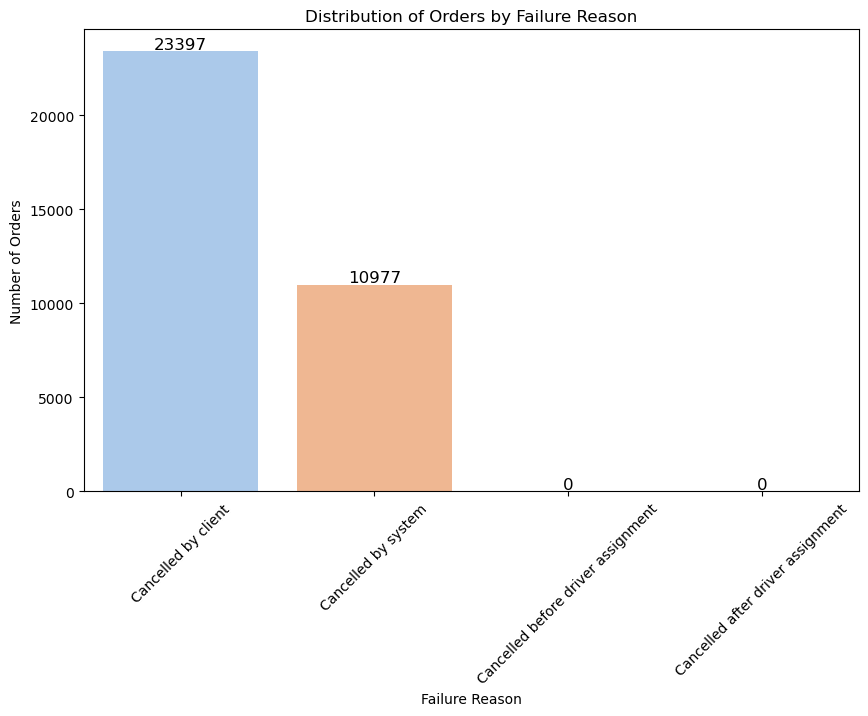

In [57]:
# Plot distribution of orders by failure reason
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_data, x='failure_reason', order=choices , palette='pastel')
plt.title('Distribution of Orders by Failure Reason')
plt.xlabel('Failure Reason')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Add counts on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height), ha='center', va='center', fontsize=12, color='black'
                , xytext=(0, 5), textcoords='offset points')


plt.show()


In [41]:
# Define failure reasons
conditions = [
     (merged_data['is_driver_assigned_key'] == 0) ,  # Cancelled before driver assignment
    (merged_data['is_driver_assigned_key'] == 1)  # Cancelled after driver assignment
]

choices = [
    'Cancelled before driver assignment',
    'Cancelled after driver assignment'
]

merged_data['failure_reason2'] = pd.Categorical(np.select(conditions, choices, default='Other'), categories=choices)


In [42]:
merged_data['failure_reason2'].value_counts()

failure_reason2
Cancelled before driver assignment    25536
Cancelled after driver assignment      8838
Name: count, dtype: int64

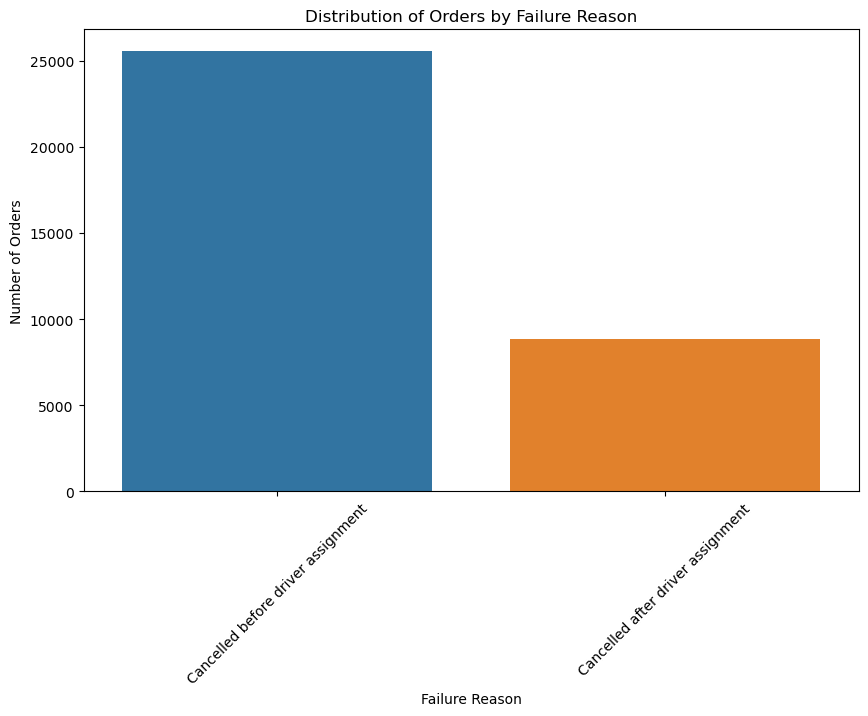

In [43]:
# Plot distribution of orders by failure reason
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='failure_reason2', order=choices)
plt.title('Distribution of Orders by Failure Reason')
plt.xlabel('Failure Reason')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

As we can see through our visualizations most of failures reasons because of clients even before driver assignment

# 3. Distribution of Failed Orders by Hour

In [44]:
# Convert order_datetime to datetime
merged_data['order_datetime'] = pd.to_datetime(merged_data['order_datetime'])

# Extract hour from datetime
merged_data['hour'] = merged_data['order_datetime'].dt.hour

# Filter for failed orders only
failed_orders = merged_data[merged_data['failure_reason'].isin(['Cancelled by client', 'Cancelled by system', 'Cancelled before driver assignment', 'Cancelled after driver assignment'])]


C:\Users\karim\AppData\Local\Temp\ipykernel_34800\1764184724.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['order_datetime'] = pd.to_datetime(merged_data['order_datetime'])


In [45]:
failed_orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,failure_reason,failure_reason2,hour
0,2024-08-29 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11,Cancelled by client,Cancelled after driver assignment,18
1,2024-08-29 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,Cancelled by client,Cancelled before driver assignment,20
2,2024-08-29 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,Cancelled by client,Cancelled before driver assignment,20
3,2024-08-29 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,Cancelled by client,Cancelled before driver assignment,20
4,2024-08-29 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11,Cancelled by client,Cancelled after driver assignment,12
...,...,...,...,...,...,...,...,...,...,...,...,...
34369,2024-08-29 13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,3.000516e+11,Cancelled by client,Cancelled before driver assignment,13
34370,2024-08-29 13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,NaN,Cancelled by client,Cancelled before driver assignment,13
34371,2024-08-29 13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,3.000516e+11,Cancelled by client,Cancelled after driver assignment,13
34372,2024-08-29 13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,NaN,Cancelled by client,Cancelled before driver assignment,13


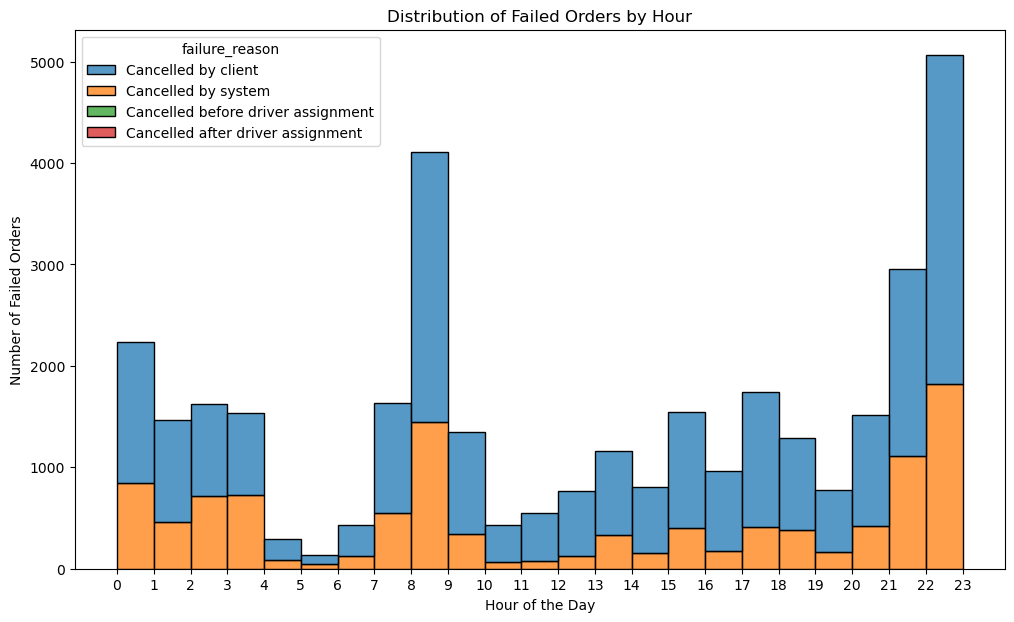

In [46]:
# Plotting
plt.figure(figsize=(12, 7))
sns.histplot(data=failed_orders, x='hour', hue='failure_reason', multiple='stack', binwidth=1, palette='tab10')
plt.title('Distribution of Failed Orders by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Failed Orders')
plt.xticks(range(24))
plt.show()


It seems we have a problem in most two important time of the day the begining of day at 8:9 am where it is supposed to be peak hour for clients who are in rush so they cancel trip , same as the end of day where it is supposed to less traffic but still we lose clients alllllot at this time.

# 4. Average Time to Cancellation

In [48]:
# Ensure cancellation_time_in_seconds is available
merged_data['cancellations_time_in_seconds'] = pd.to_numeric(merged_data['cancellations_time_in_seconds'], errors='coerce')

# Filter out cancellations where time is NaN
cancellation_data = merged_data[~merged_data['cancellations_time_in_seconds'].isna()]

# Calculate average cancellation time by hour and driver assignment status
cancellation_data['is_driver_assigned_key'] = cancellation_data['is_driver_assigned_key'].map({0: 'Before Driver', 1: 'After Driver'})

average_cancellation_time = cancellation_data.groupby(['hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().reset_index()


C:\Users\karim\AppData\Local\Temp\ipykernel_34800\1220049948.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_data['is_driver_assigned_key'] = cancellation_data['is_driver_assigned_key'].map({0: 'Before Driver', 1: 'After Driver'})


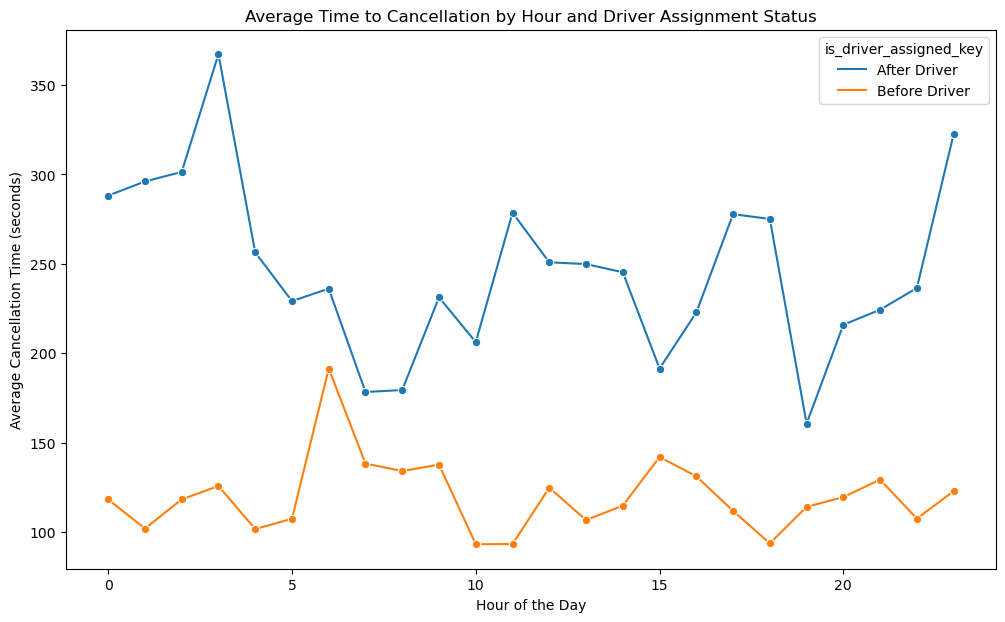

In [50]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=average_cancellation_time, x='hour', y='cancellations_time_in_seconds', hue='is_driver_assigned_key', marker='o')
plt.title('Average Time to Cancellation by Hour and Driver Assignment Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Cancellation Time (seconds)')
plt.show()


We need to check calls between clients and drivers as it seems many clients cancel trip in less than 5 mins of assign driver
and check why there is no assign for driver qucikly as we can see there is up to 3 to 4 min with no driver